In [ ]:
# %%

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# %%

df_ab = pd.read_csv("/Users/sooriya/Documents/marketing_AB.csv")

In [ ]:
# %%

df_ab.shape

(588101, 7)

In [ ]:
# %%

df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [ ]:
# %%

df_ab.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [ ]:
# %%

df_ab.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
# %%

# checking for any duplicate rows if exists
df_ab.duplicated(subset=['user id']).sum()

0

In [ ]:
# %%

# dropping both
df_ab.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [ ]:
# %%

df_ab.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [ ]:
# %%

# check if the categorical columns have the appropriate number of levels
df = df_ab.drop(columns=['total ads'], axis=1)

In [ ]:
# %%

df.head()

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14


In [ ]:
# %%

for i in df.columns:
    print(i.upper(), ":", df[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


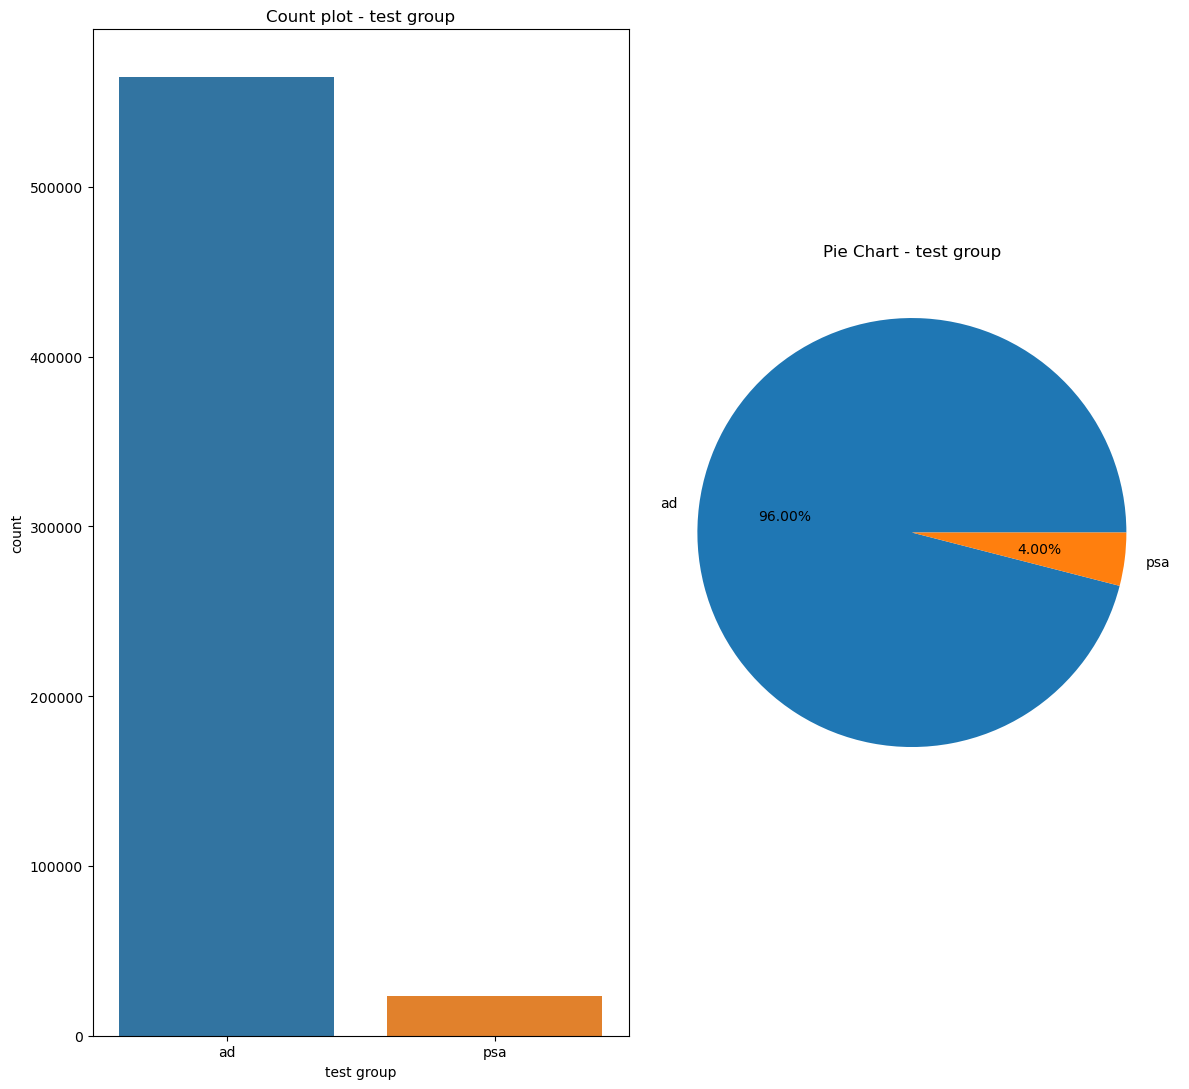

In [ ]:
# %%

# Univariate Analysis


def plot(variable):
    plt.figure(figsize=(12, 11))
    # count plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=variable, data=df)
    plt.title(f'Count plot - {variable}')
    # pie chart
    plt.subplot(1, 2, 2)
    counts = df[variable].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
    plt.title(f'Pie Chart - {variable}')
    plt.tight_layout()
    plt.show()
    return


variable = 'test group'
plot(variable)

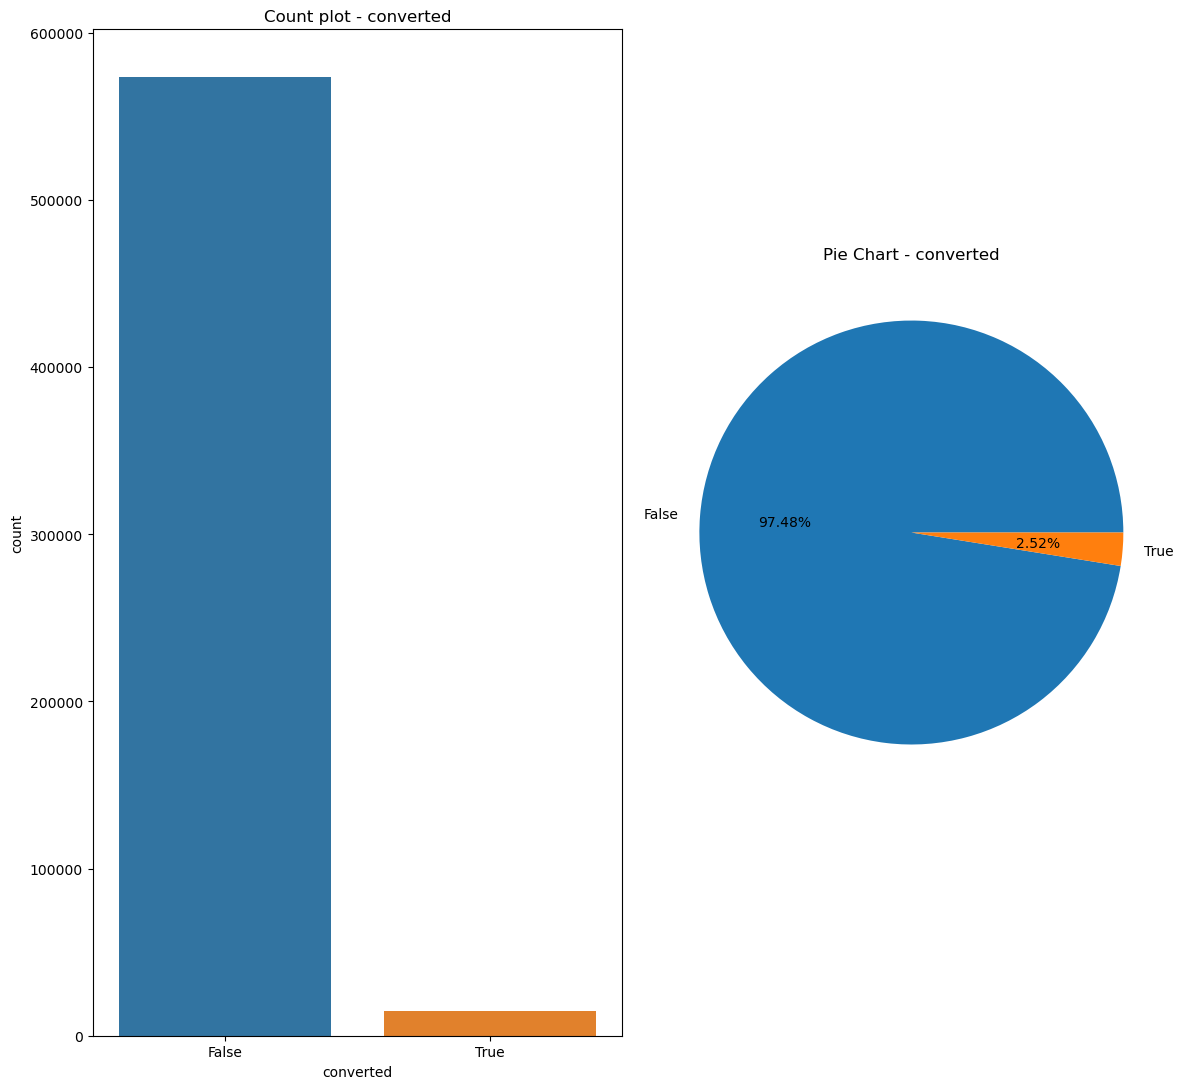

In [ ]:
# %%

variable = 'converted'
plot(variable)

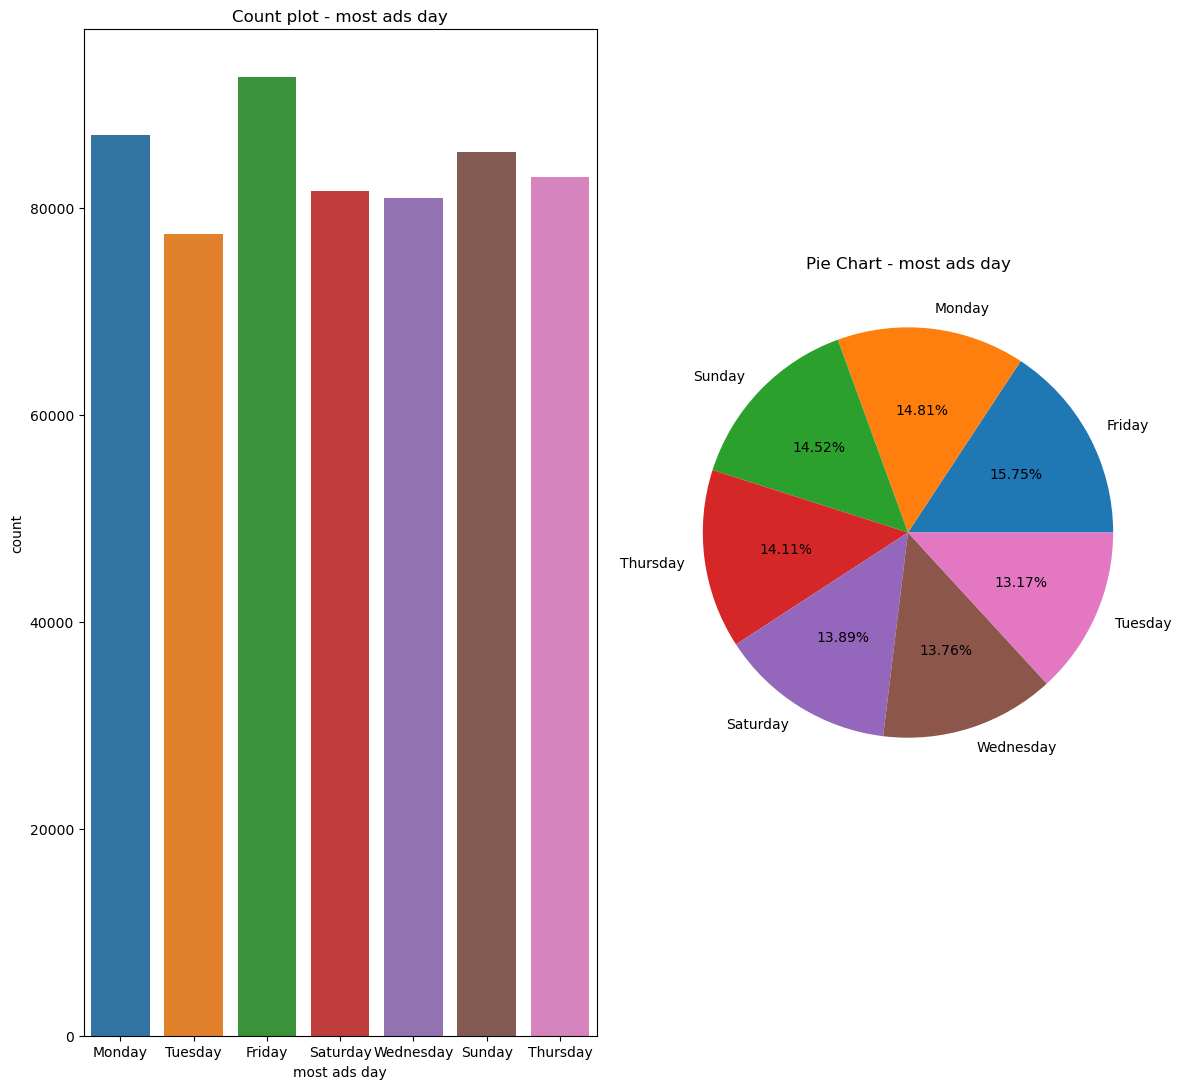

In [ ]:
# %%

variable = 'most ads day'
plot(variable)

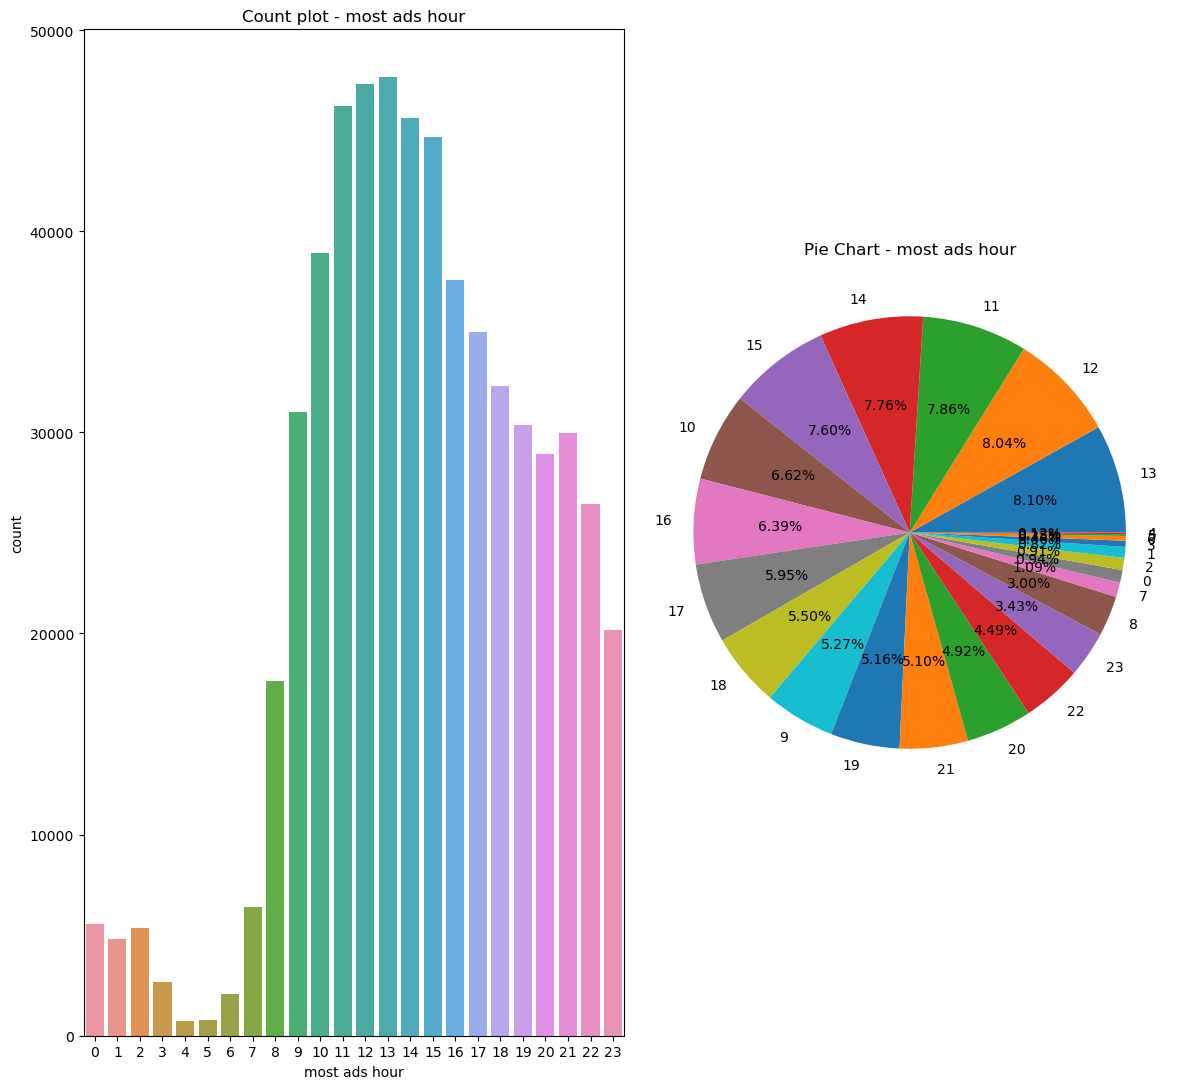

In [ ]:
# %%

variable = 'most ads hour'
plot(variable)

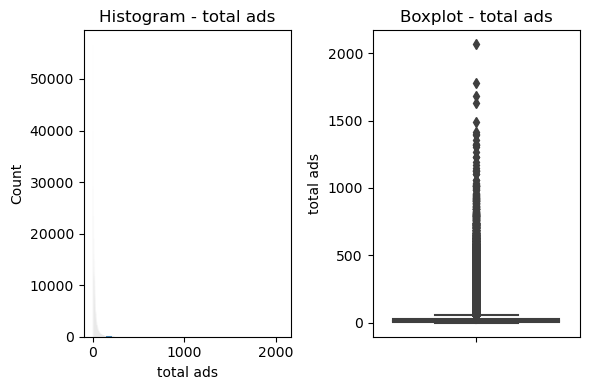

In [ ]:
# %%

variable = 'total ads'
plt.figure(figsize=(6, 4))
# Histogram plot
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df_ab)
plt.title(f'Histogram - {variable}')
# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df_ab)
plt.title(f'Boxplot - {variable}')
plt.tight_layout()
plt.show()

In [ ]:
# %%

df_ab['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

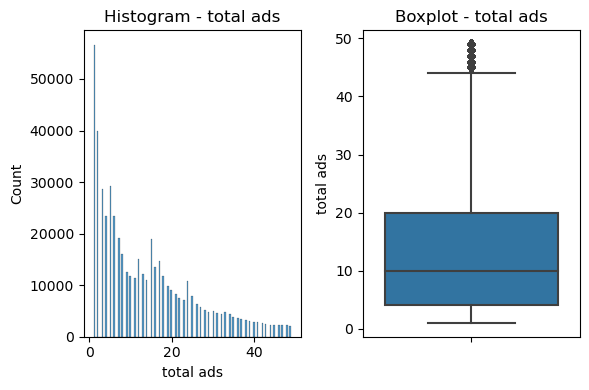

In [ ]:
# %%

# Filtering the data for a value close to 75th percentile for a better visualization
variable = 'total ads'
plt.figure(figsize=(6, 4))
# Histogram plot
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df_ab[df_ab['total ads'] < 50])
plt.title(f'Histogram - {variable}')
# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df_ab[df_ab['total ads'] < 50])
plt.title(f'Boxplot - {variable}')
plt.tight_layout()
plt.show()

In [ ]:
# %%

# Bivariate Analysis
crosstab_output = pd.crosstab(
    df_ab['test group'], df_ab['converted'], normalize='index')
crosstab_output

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

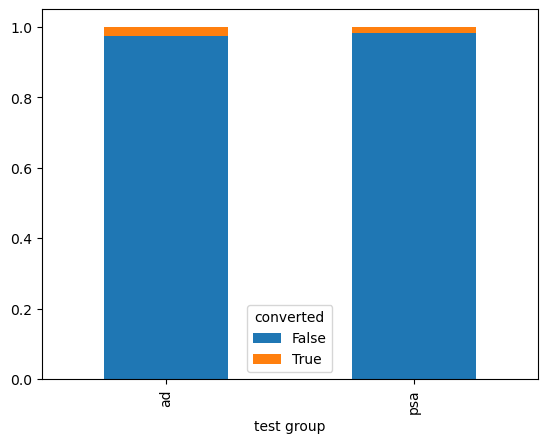

In [ ]:
# %%

crosstab_output.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

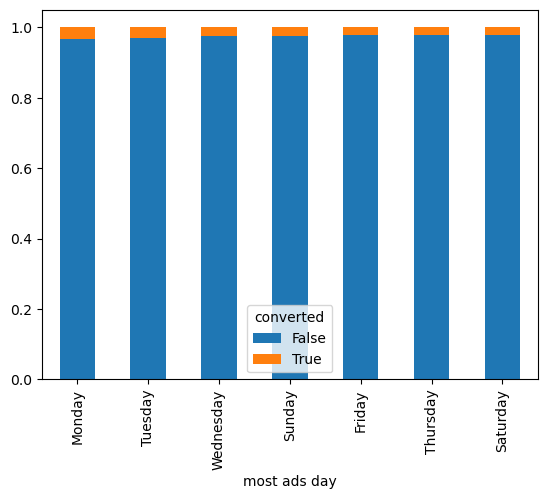

In [ ]:
# %%

crosstab_output = pd.crosstab(
    df_ab['most ads day'], df_ab['converted'], normalize='index')
print(crosstab_output.sort_values(by=True, ascending=False))
crosstab_output.sort_values(by=True, ascending=False).plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

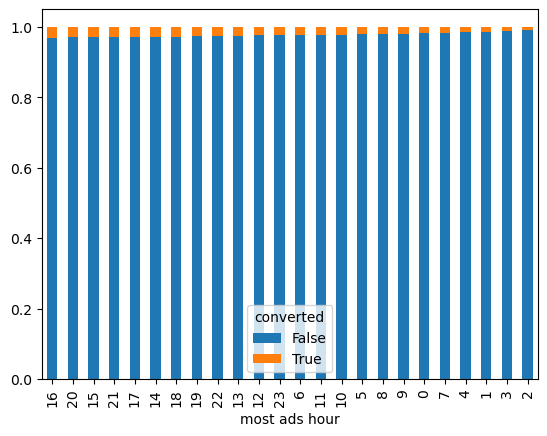

In [ ]:
# %%

crosstab_output = pd.crosstab(
    df_ab['most ads hour'], df_ab['converted'], normalize='index')
print(crosstab_output.sort_values(by=True, ascending=False))
crosstab_output.sort_values(by=True, ascending=False).plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

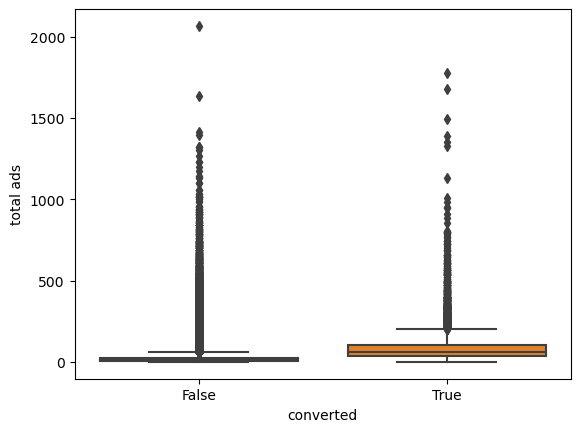

In [ ]:
# %%

sns.boxplot(data=df_ab, x='converted', y='total ads')

<Axes: xlabel='converted', ylabel='total ads'>

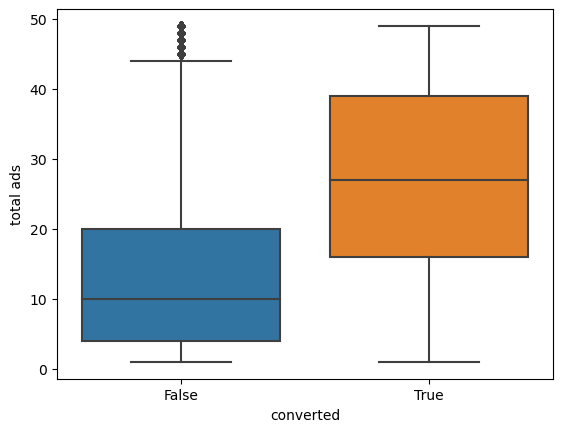

In [ ]:
# %%

sns.boxplot(data=df_ab[df_ab['total ads'] < 50], x='converted', y='total ads')

In [ ]:
# %%

# Statistical Analysis
alpha = 0.05
for variable in df.columns:
    if variable != 'converted':
        # create a contigency table(cross-tabulation)
        Contigency_table = pd.crosstab(df[variable], df['converted'])
        # perform chi square test
        chi2, p, _, _ = chi2_contingency(Contigency_table)
        print(f"chi square value for {variable} vs converted is : {chi2}")
        print(f"The p-value is {p}")
        # check for significance
        if p < alpha:
            print(
                f"The differenece in conversion rate across the {variable} is statistically significant.")
        else:
            print(
                f"There is no significant difference in onversion rates across {variable}.")

chi square value for test group vs converted is : 54.005823883685245
The p-value is 1.9989623063390075e-13
The differenece in conversion rate across the test group is statistically significant.
chi square value for most ads day vs converted is : 410.0478857936585
The p-value is 1.932184379244731e-85
The differenece in conversion rate across the most ads day is statistically significant.
chi square value for most ads hour vs converted is : 430.76869230822086
The p-value is 8.027629823696771e-77
The differenece in conversion rate across the most ads hour is statistically significant.


In [ ]:
# %%

# check assumptions
# Normality Assumption
shapiro_sta_true, shapiro_pvalue_true = shapiro(
    df_ab[df_ab['converted'] == True]['total ads'])
shapiro_sta_false, shapiro_pvalue_false = shapiro(
    df_ab[df_ab['converted'] == True]['total ads'])

print(f"shapiro-Wilk Test for normality : p_value = {shapiro_pvalue_true}")
print(f"shapiro-Wilk Test for normality : p_value = {shapiro_pvalue_false}")

shapiro-Wilk Test for normality : p_value = 0.0
shapiro-Wilk Test for normality : p_value = 0.0


/Users/sooriya/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# %%

# Equality of variances
levene_stat, levene_p_value, = levene(
    df_ab[df_ab['converted']]['total ads'], df_ab[~df_ab['converted']]['total ads'])
print(f"Levene's test for equality of variances:p-value= {levene_p_value}")

Levene's test for equality of variances:p-value= 0.0


In [ ]:
# %%

# Step 2: Perform a suitable test
alpha = 0.05
if shapiro_pvalue_true > alpha and shapiro_pvalue_false > alpha and levene_p_value > alpha:
    t_stat, t_p_value = ttest_ind(
        df_ab[df_ab['converted']]['total ads'], df_ab[~df_ab['converted']]['total ads'])
    print(f"Independent wo-sample t-test:p-Value = {t_p_value}")
else:
    u_stat, u_pvalue = mannwhitneyu(
    df_ab[df_ab['converted']]['total ads'], df_ab[~df_ab['converted']]['total ads'])
    print(f"Manwhiteney U test:p-value = {u_pvalue}")

Manwhiteney U test:p-value = 0.0
